In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

In [107]:
#Dataset 
diabetic_data = pd.read_csv('diabetic_data.csv')
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [108]:
#indexing dataset from diabetic data 
DF = diabetic_data.iloc[:, 12:16].values
pd.DataFrame(DF)

,0,1,2,3
0,41,0,1,0
1,59,0,18,0
2,11,5,13,2
3,44,1,16,0
4,51,0,8,0
...,...,...,...,...
101761,51,0,16,0
101762,33,3,18,0
101763,53,0,9,1
101764,45,2,21,0


In [109]:
#Elbow method to find the optimal K-Value
K = range(1,10)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(DF)
    wss.append(kmeans.inertia_)
    

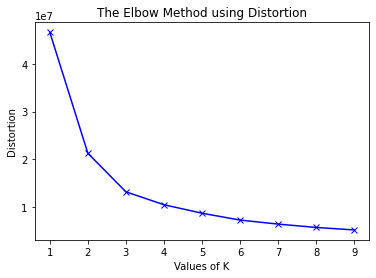

In [110]:
plt.plot(K, wss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

From the curve above, the optimal K value is 2 because with the increased k value, the cost(distortion) is decreasing in linear fashion after k=2. 

In [116]:
#Calculating the coordinates of the cluster centers
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(DF) #Scaling the data and lean the scaling parameter 

kmeanModel = KMeans(n_clusters=2, max_iter = 200) #Clustering using KMeans method
kmeanModel.fit(X_std) #fitting this calculation to transformer
center = kmeanModel.cluster_centers_ 
center

array([[ 0.39185444,  1.20171063,  0.94771457, -0.00669919],
       [-0.14830755, -0.45481878, -0.35868734,  0.00253548]])

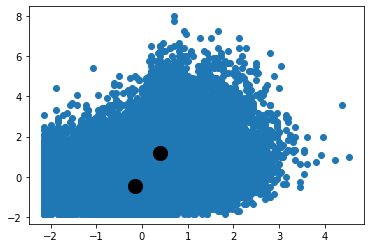

In [113]:
plt.scatter(X_std[:,0], X_std[:,2]) #Plotting scatter Plot 
# Plot the clusters centers
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], 
            s=200, # Setting centroid size
            c='black')  # Setting centroid color
plt.show()

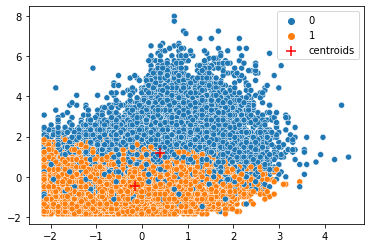

In [120]:
sns.scatterplot(x=X_std[:,0], y=X_std[:,2], hue=kmeanModel.labels_) #plotting scatterplot using seaborn
plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], marker="+", c="r", s=100, label="centroids") #Plotting the center of the clusters
plt.legend()
plt.show()

Figure: Second iteration plot using 2 KMeans. The cluster visulization providing best evidence to prove k=2 to be the best optimal k-value. 